In [8]:
# Step 1: Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display plots inline in Jupyter
%matplotlib inline


In [9]:
# Step 2: Load the Dataset
df = pd.read_csv('sales_data_with_discounts.csv')
df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,1/4/2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.50120
1,1/4/2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102960,89323.89704
2,1/4/2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910160,102042.08980
3,1/4/2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.92530
4,1/4/2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.05377


Descriptive Analytics for Numerical Columns

In [10]:
# Step 3: Identify Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [12]:
# Step 4: Compute Mean, Median, Std using .agg() and Mode separately
basic_stats = df[numerical_cols].agg(['mean', 'median', 'std']).T
basic_stats['mode'] = [df[col].mode().iloc[0] if not df[col].mode().empty else np.nan for col in numerical_cols]
basic_stats.columns = ['Mean', 'Median', 'Std Dev', 'Mode']
basic_stats


,Mean,Median,Std Dev,Mode
Volume,5.066667,4.000000,4.231602,3.000000
Avg Price,10453.433333,1450.000000,18079.904840,400.000000
Total Sales Value,33812.835556,5700.000000,50535.074173,24300.000000
Discount Rate (%),15.155242,16.577766,4.220602,5.007822
Discount Amount,3346.499424,988.933733,4509.902963,69.177942
Net Sales Value,30466.336131,4677.788059,46358.656624,326.974801


📊 Data Visualization
Histograms

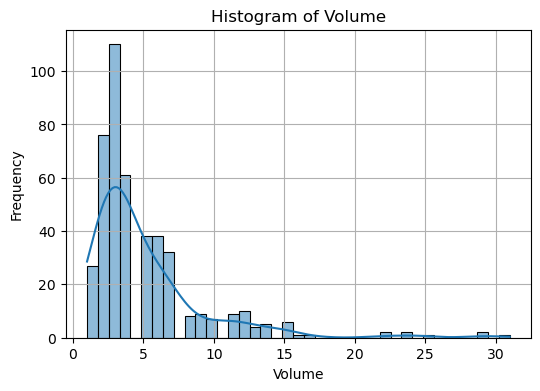

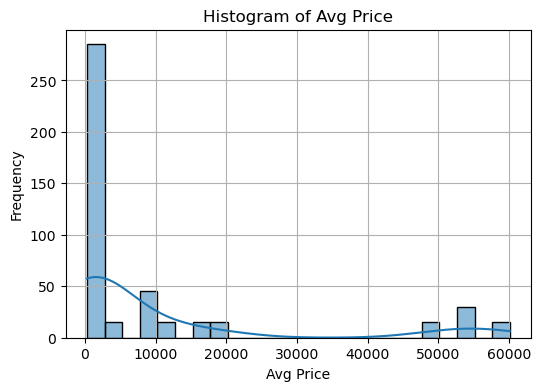

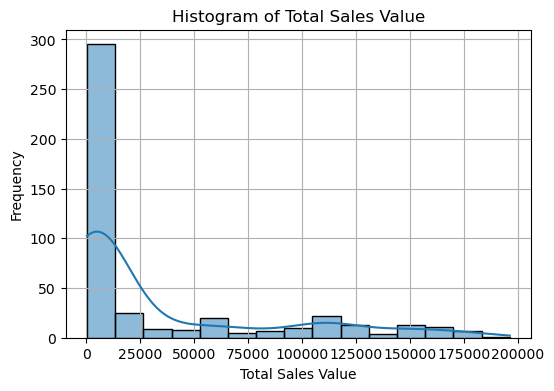

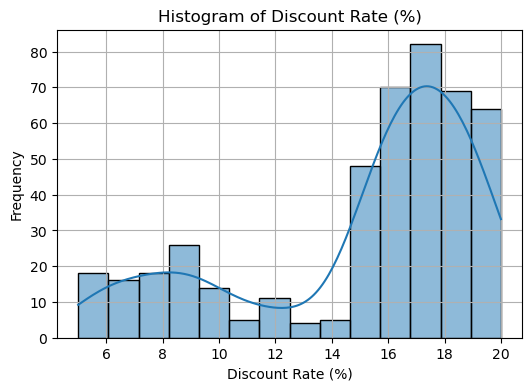

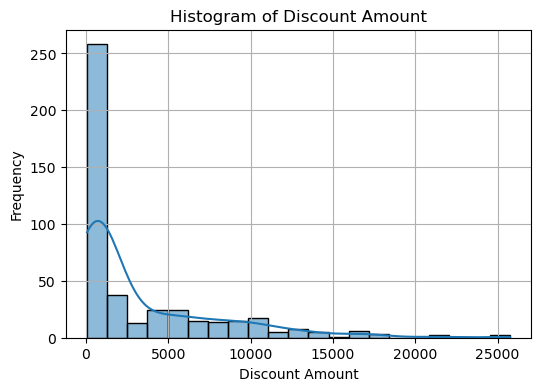

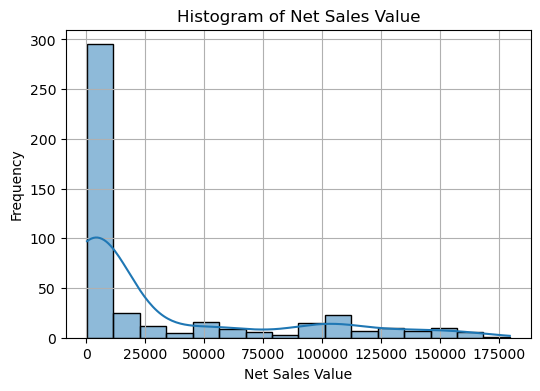

In [13]:
# Step 5: Histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


Boxplots

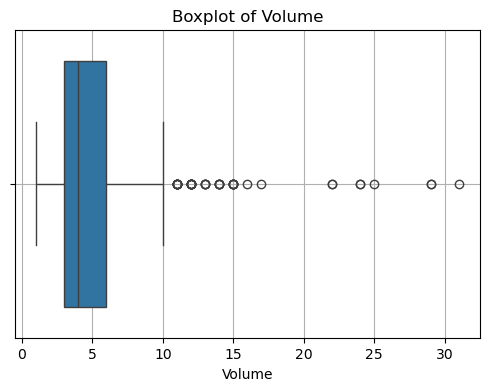

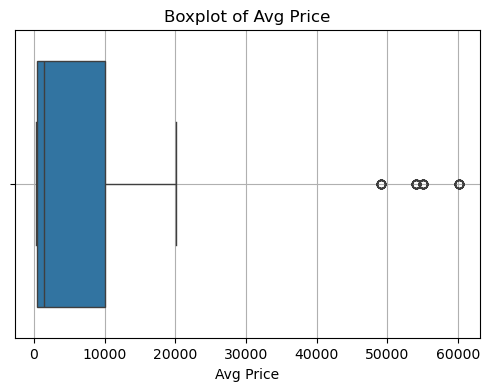

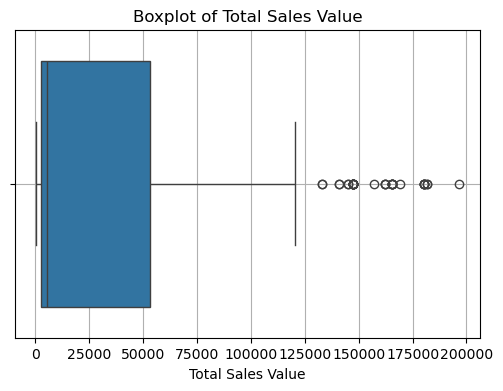

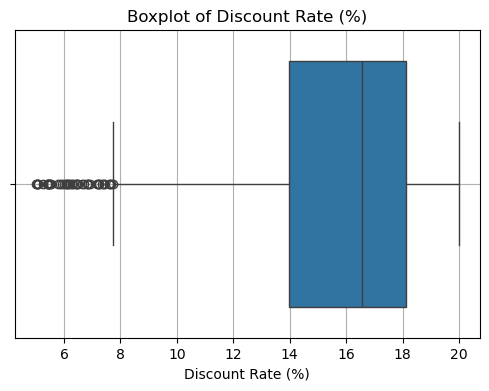

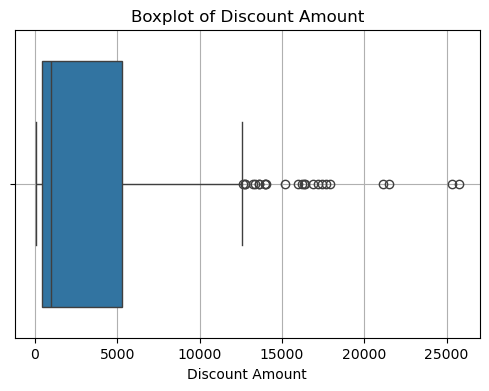

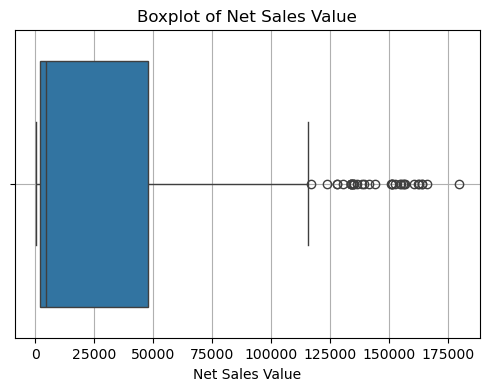

In [14]:
# Step 6: Boxplots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()


Bar Charts for Categorical Columns

In [15]:
# Step 7: Identify and Visualize Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols


['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

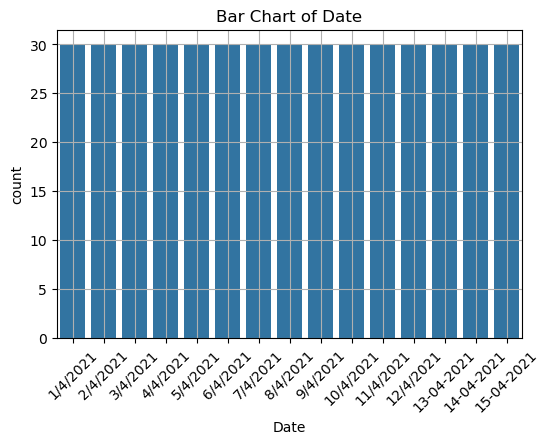

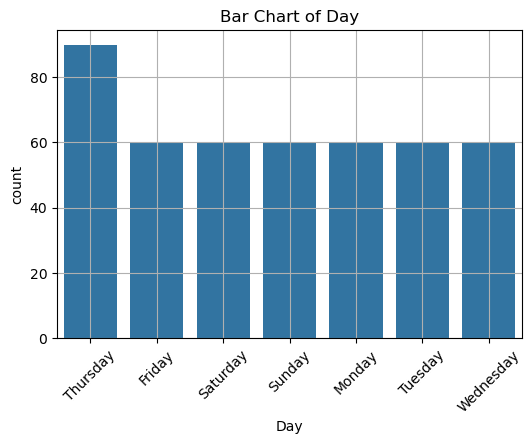

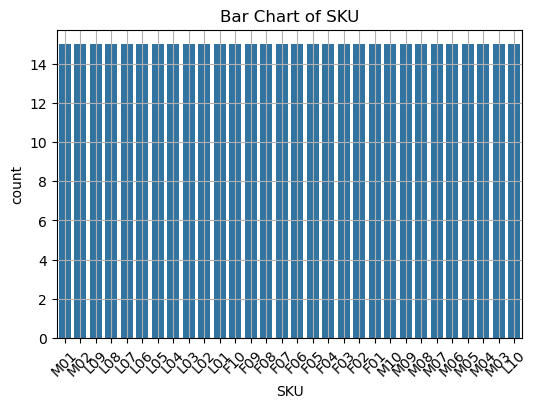

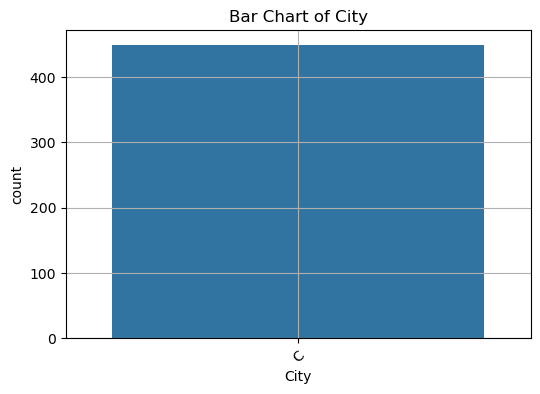

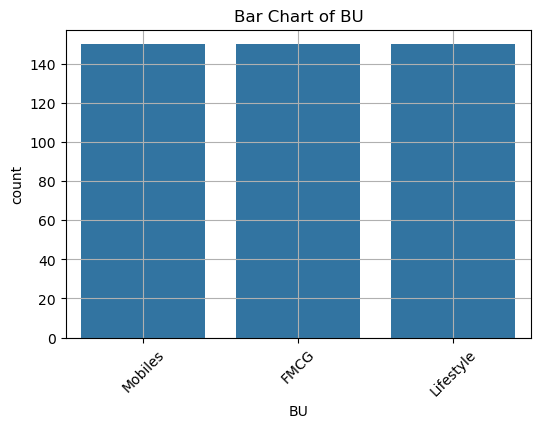

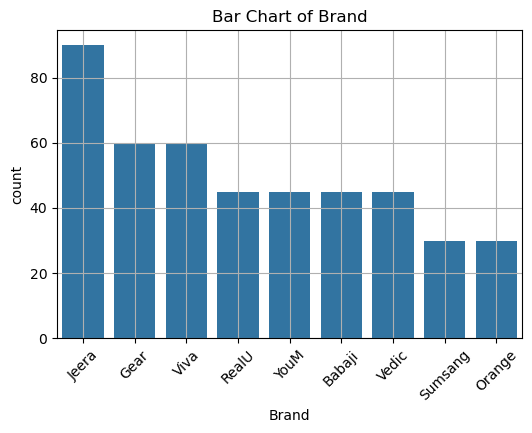

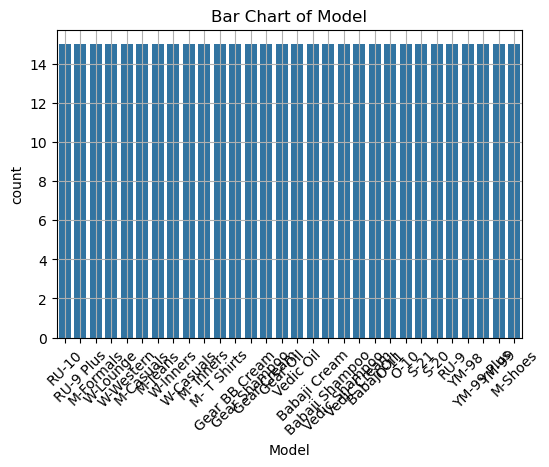

In [16]:
# Step 8: Bar Charts
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


Standardization of Numerical Variables (Z-score)

In [17]:
# Step 9: Standardize Numerical Columns
df_standardized = df.copy()
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    df_standardized[col] = (df[col] - mean) / std

df_standardized[numerical_cols].head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342


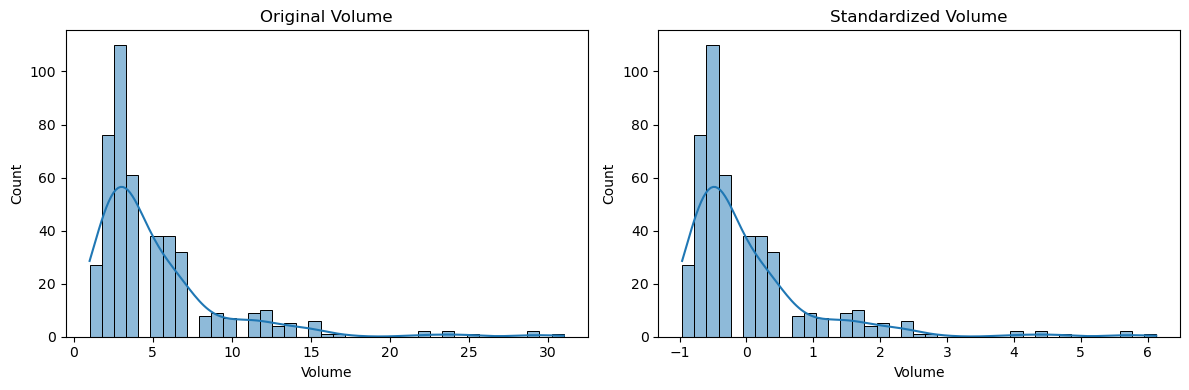

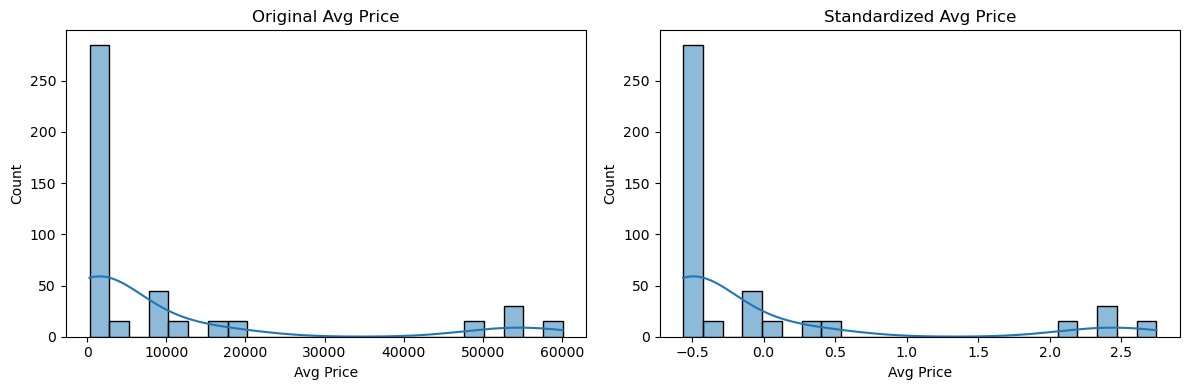

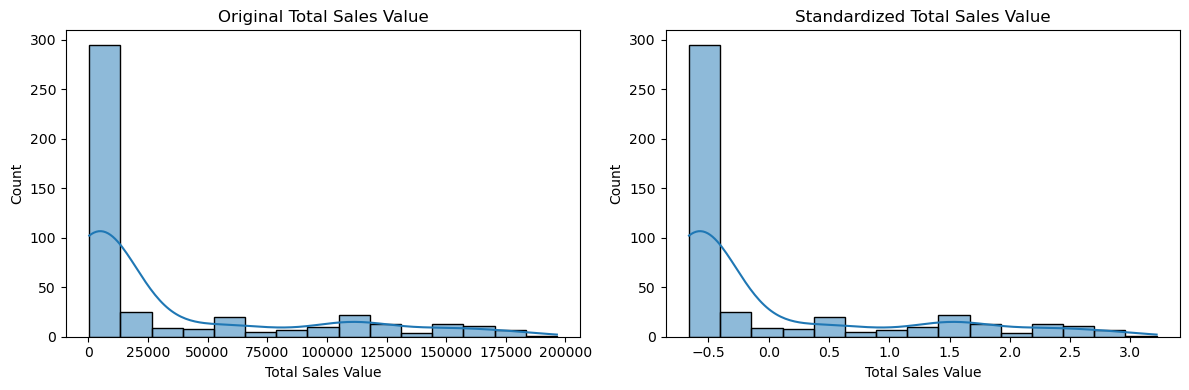

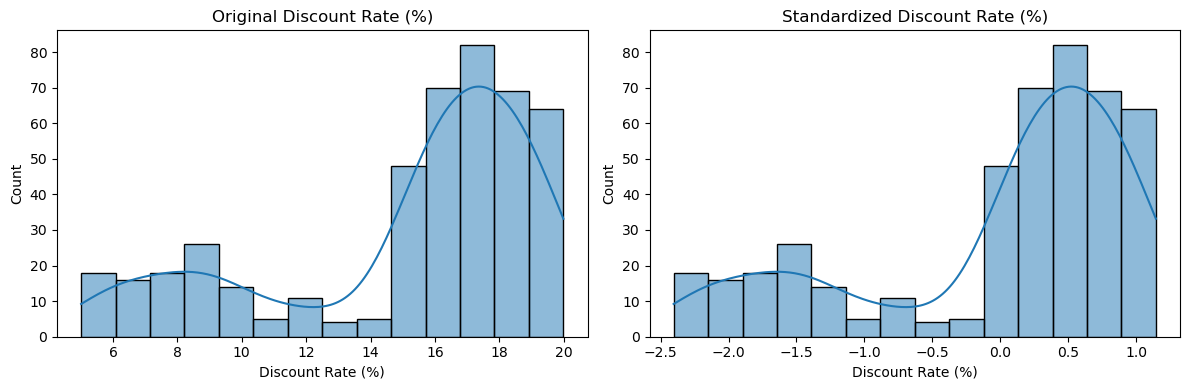

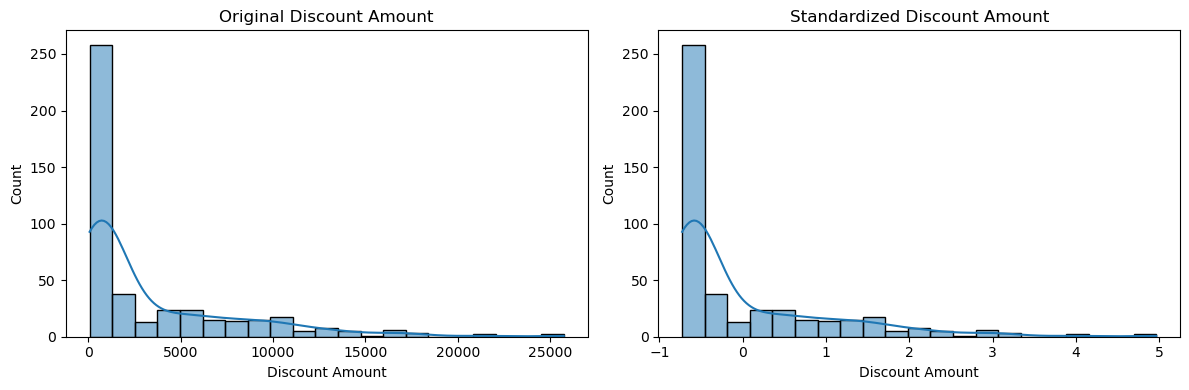

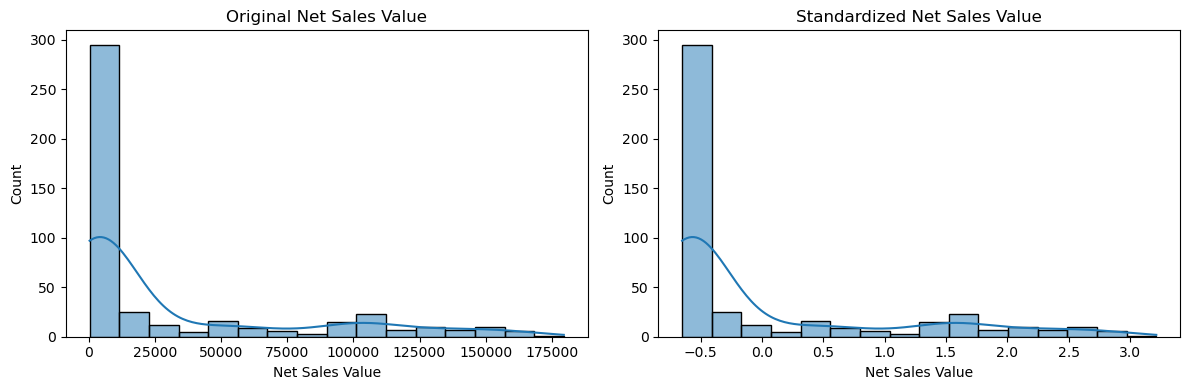

In [18]:
# Step 10: Comparison Before and After Standardization
for col in numerical_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_title(f'Original {col}')
    sns.histplot(df_standardized[col], kde=True, ax=axs[1])
    axs[1].set_title(f'Standardized {col}')
    plt.tight_layout()
    plt.show()


 One-Hot Encoding of Categorical Variables

In [19]:
# Step 11: One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_1/4/2021,Date_10/4/2021,Date_11/4/2021,Date_12/4/2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.50120,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102960,89323.89704,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910160,102042.08980,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.92530,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.05377,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [20]:
print("Summary:")
print("- Basic statistics give insights into the central tendency and spread.")
print("- Histograms and boxplots help identify skewness and outliers.")
print("- Bar charts reveal the frequency of each category.")
print("- Standardization ensures uniform scale across features.")
print("- One-hot encoding prepares categorical data for machine learning models.")


Summary:
- Basic statistics give insights into the central tendency and spread.
- Histograms and boxplots help identify skewness and outliers.
- Bar charts reveal the frequency of each category.
- Standardization ensures uniform scale across features.
- One-hot encoding prepares categorical data for machine learning models.
